# complex output regression

In [194]:
import tensorflow as tf
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


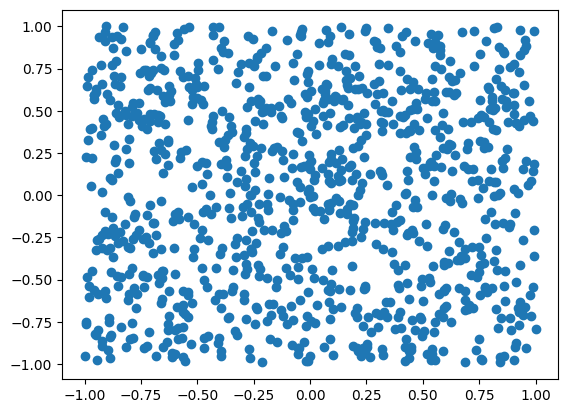

[ 8.26922498e-02+8.26167779e-02j -6.12395743e-01+5.48019730e-01j
  4.84223190e-01+7.41322583e-01j  6.47948168e-01+2.88741478e-02j
  8.27856779e-01-3.25537946e-01j -3.90239452e-01+8.09982127e-01j
 -4.02689404e-01+1.31455719e-01j  9.16303456e-01+7.34652644e-01j
  4.76497966e-01-7.42393465e-01j -7.05886433e-01+2.15107123e-01j
  9.81457834e-01-1.72479418e-02j -9.12088144e-01+7.80984501e-01j
  7.51572462e-02+1.24552625e-02j -4.32837671e-01-6.76630738e-01j
 -4.57288738e-01+5.16699662e-01j -1.61234085e-01+5.01454816e-01j
 -4.64872200e-01+2.07003709e-01j  5.58973344e-01+1.77947750e-01j
  9.65360187e-01-2.66705450e-01j  7.61563602e-01-6.31122593e-01j
  3.67816919e-01-3.29377829e-01j -1.46759201e-01+1.38269004e-01j
  5.64384387e-01-9.59187033e-01j -7.81148030e-01-2.70698743e-01j
  9.38266315e-01+5.17380255e-01j -2.39785082e-01-2.67132554e-03j
 -1.17050295e-01+1.96057506e-02j  2.64960311e-01-9.46910488e-01j
  6.74395476e-01+1.02763541e-01j -2.18579602e-01+8.66205237e-01j
 -6.55283323e-01+1.617200

In [195]:
import numpy as np
def tested_function(z):
    # return np.cos(z)
    return np.abs(z)*np.exp(1.j * (np.angle(z)+np.pi/2.))
data_size = 1000
data = np.random.uniform(-1, 1, data_size) + 1.j * np.random.uniform(-1, 1, data_size)
expected_output = tested_function(data)

import matplotlib.pyplot as plt
plt.figure()
plt.scatter(np.real(data), np.imag(data))
plt.show()

print(tested_function(data))

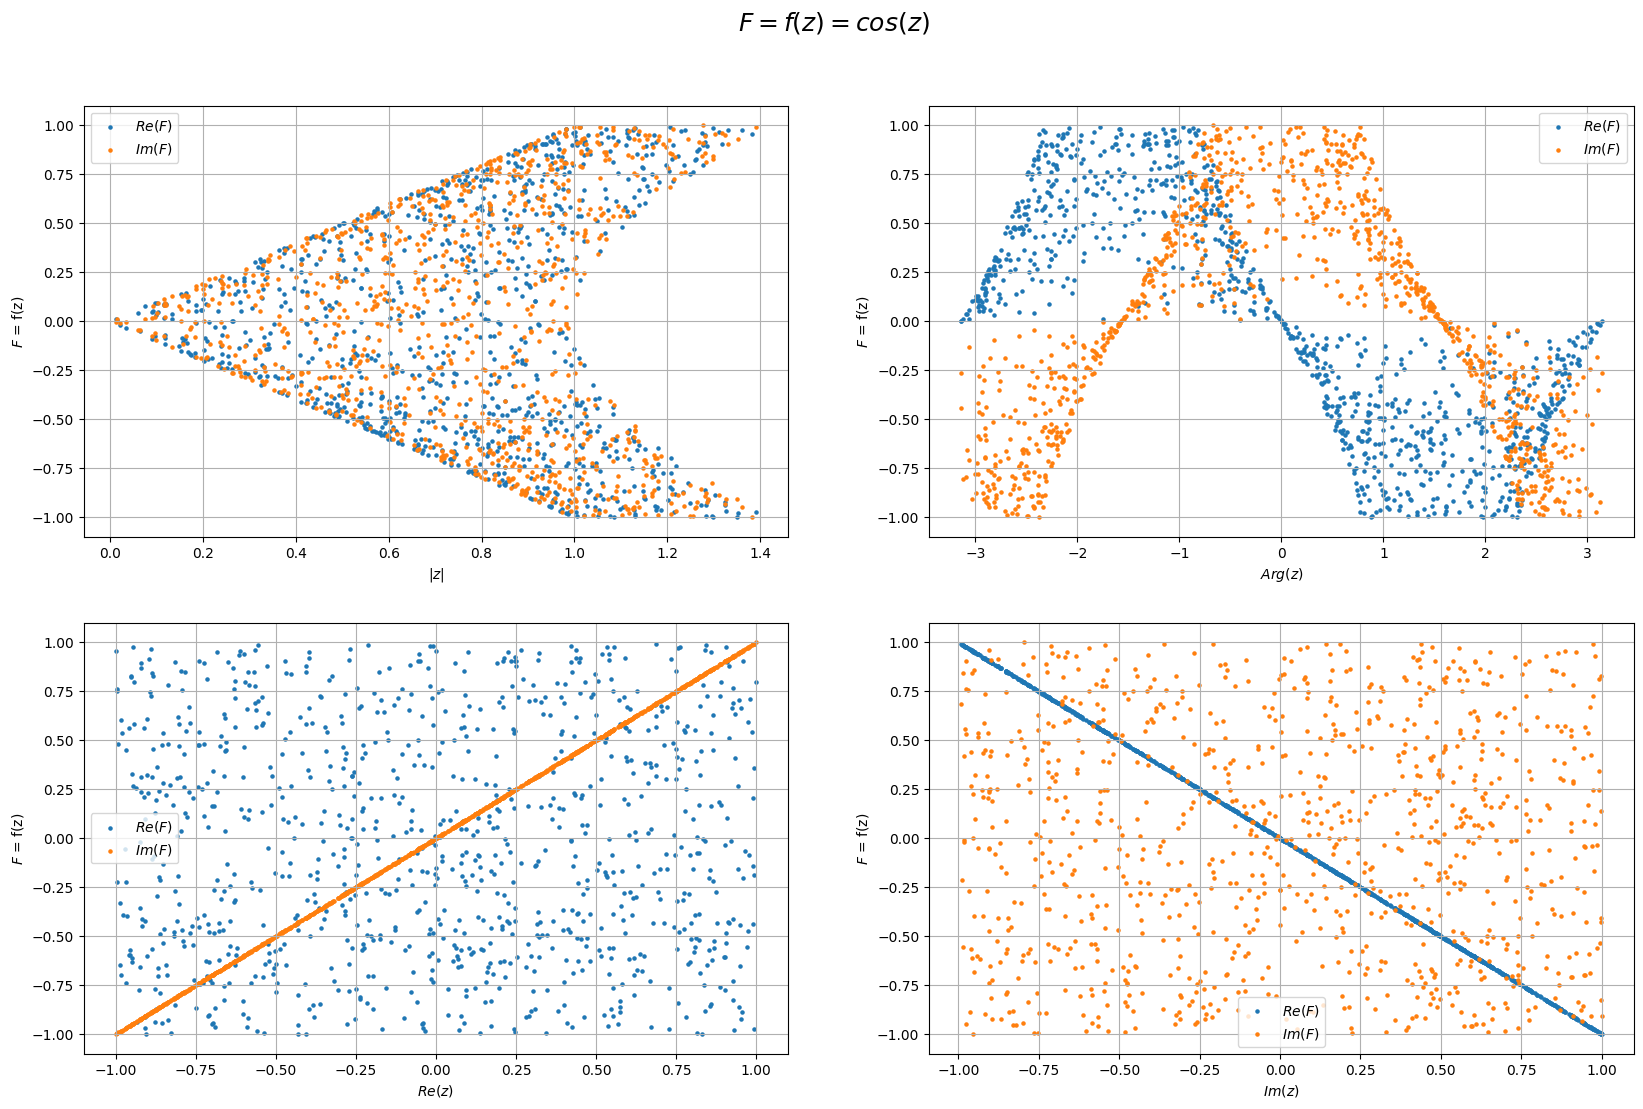

In [196]:
def plot_complex_function(x, y, title = None):
    
    plt.figure(figsize=(20,12))
    if title:
        plt.suptitle(title, fontsize=18)
        plt.subplots_adjust(top=0.90)
        

    plt.subplot(2, 2, 1)
    plt.scatter(np.abs(x), np.real(y), label='$Re(F)$', s=5)
    plt.scatter(np.abs(x), np.imag(y), label='$Im(F)$', s=5)
    plt.xlabel('$|z|$')
    plt.ylabel('$F$ = f(z)')
    plt.grid(True)
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.scatter(np.angle(x), np.real(y), label='$Re(F)$', s=5)
    plt.scatter(np.angle(x), np.imag(y), label='$Im(F)$', s=5)
    plt.xlabel('$Arg(z)$')
    plt.ylabel('$F$ = f(z)')
    plt.grid(True)
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.scatter(np.real(x), np.real(y), label='$Re(F)$', s=5)
    plt.scatter(np.real(x), np.imag(y), label='$Im(F)$', s=5)
    plt.xlabel('$Re(z)$')
    plt.ylabel('$F$ = f(z)')
    plt.grid(True)
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.scatter(np.imag(x), np.real(y), label='$Re(F)$', s=5)
    plt.scatter(np.imag(x), np.imag(y), label='$Im(F)$', s=5)
    plt.xlabel('$Im(z)$')
    plt.ylabel('$F$ = f(z)')
    plt.grid(True)
    plt.legend()

    plt.show()
    
plot_complex_function(data, expected_output, '$F = f(z) = cos(z)$')

In [197]:
import pandas as pd
    
def make_dataframe(fit_history):
    df = pd.DataFrame(fit_history.history)
    df['epoch'] = fit_history.epoch
    return df
    
def plot_loss_history(fit_history, nn_type, threshold_multiplier = 10):

    df = make_dataframe(fit_history)
    print(f'{df.tail(5)}\n')

    train_1st_percentile = np.percentile(df['loss'].values, 1)
    val_1st_percentile = np.percentile(df['val_loss'].values, 1)
    print(f'1st percentile of train loss:       {train_1st_percentile:.4e}')
    print(f'1st percentile of validation loss:  {val_1st_percentile:.4e}')
    
    threshold = np.maximum(train_1st_percentile, val_1st_percentile)
    fig, axes = plt.subplots(3, sharex=True, figsize=(8,6))
    axes[0].set_title(f"{nn_type} loss history")
    for axis in axes:
        axis.set_ylim((0, threshold_multiplier*threshold))
        axis.plot(df['epoch'], df['loss'], label='training set')
        axis.plot(df['epoch'], df['val_loss'], linestyle='dashed', label='validation set')
        threshold_multiplier /= 2
    axes[-1].legend(loc="lower left")
    axes[-1].set_xlabel("epoch no.")
    # fig.supxlabel(f"min_train_loss: {1}\nmin_val_loss: {2}", y=-0.1, x, ha='right')
    fig.supylabel("loss value")


def plot_loss_history_comparision(rvnn_fit_history, cvnn_fit_history, scale_upper_bound = 1):
    
    rvnn_dataframe = make_dataframe(rvnn_fit_history)
    cvnn_dataframe = make_dataframe(cvnn_fit_history)
    
    upper_bound = 2*np.median(np.concatenate((rvnn_dataframe['loss'].values, rvnn_dataframe['val_loss'].values, cvnn_dataframe['loss'].values, cvnn_dataframe['val_loss'].values)))
    
    plt.figure()
    plt.ylim((0, scale_upper_bound*upper_bound))
    plt.plot(cvnn_dataframe['epoch'], cvnn_dataframe['loss'], label='CVNN training set')
    plt.plot(cvnn_dataframe['epoch'], cvnn_dataframe['val_loss'], linestyle='dashed', label='CVNN validation set')
    plt.plot(rvnn_dataframe['epoch'], rvnn_dataframe['loss'], label='RVNN training set')
    plt.plot(rvnn_dataframe['epoch'], rvnn_dataframe['val_loss'], linestyle='dashed', label='RVNN validation set')
    plt.legend(loc="lower left")
    plt.xlabel("epoch no.")
    plt.ylabel("loss value")
    plt.show()
    
# plot_loss_history_comparision(rvnn_df, cvnn_df)

In [198]:
EPOCH_NUM = 800
VAL_RATIO = 0.2
VERBOSE_LVL = 0

from tensorflow.keras.optimizers import SGD, Adam
OPTIMIZER = lambda: SGD(learning_rate=0.01, momentum=0.01)
# OPTIMIZER = lambda: Adam()

## CVNN

In [214]:
import cvnn.layers as complex_layers
from cvnn.losses import ComplexMeanSquareError

def make_cvnn_model(verbose = False):
    model = tf.keras.models.Sequential()
    model.add(complex_layers.ComplexInput(input_shape=(1,)))
    model.add(complex_layers.ComplexDense(units=32, activation='cart_relu'))
    model.add(complex_layers.ComplexDense(units=1, activation='linear'))
    model.compile(loss=ComplexMeanSquareError(), optimizer=OPTIMIZER())
    if verbose:
        model.summary()
    return model

cvnn_model = make_cvnn_model(verbose=True)

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 complex_dense_32 (ComplexD  (None, 32)                128       
 ense)                                                           
                                                                 
 complex_dense_33 (ComplexD  (None, 1)                 66        
 ense)                                                           
                                                                 
Total params: 194 (776.00 Byte)
Trainable params: 194 (776.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Liczba parametrów w CVNN
input: 1    -> 0

dense: 32   -> 2 * (32 * (1 + 1)) = 128

dense: 1    -> 2 * (1 * (32 + 1)) = 66

            sum: 128 + 66  = 194

In [200]:
cvnn_history = cvnn_model.fit(np.array(data), expected_output, epochs=EPOCH_NUM, validation_split=VAL_RATIO, verbose=VERBOSE_LVL)

         loss  val_loss  epoch
795  0.000024  0.000028    795
796  0.000024  0.000028    796
797  0.000024  0.000028    797
798  0.000024  0.000028    798
799  0.000024  0.000028    799

1st percentile of train loss:       2.4345e-05
1st percentile of validation loss:  2.8461e-05


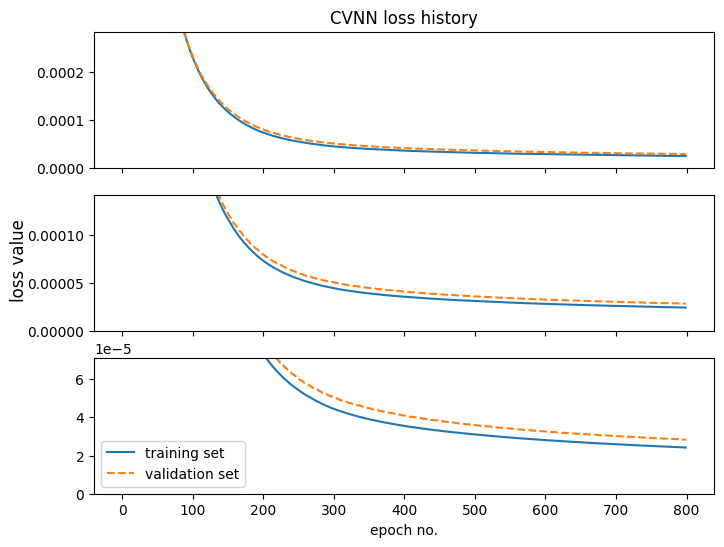

In [201]:
plot_loss_history(cvnn_history, "CVNN")

## RVNN

In [202]:
def convert_to_cartesian(complex):
    return np.array([(np.real(z), np.imag(z)) for z in complex])
rvnn_input = convert_to_cartesian(data)
rvnn_output = convert_to_cartesian(expected_output)

In [213]:
from tensorflow.keras.losses import MeanSquaredError

def make_rvnn_model(verbose = False):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input(shape=(2,)))
    model.add(tf.keras.layers.Dense(38, activation='relu'))
    model.add(tf.keras.layers.Dense(2))
    model.compile(loss=MeanSquaredError(), optimizer=OPTIMIZER())
    if verbose:
        model.summary()
    return model

rvnn_model = make_rvnn_model(verbose=True)

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


 dense_30 (Dense)            (None, 38)                114       
                                                                 
 dense_31 (Dense)            (None, 2)                 78        
                                                                 
Total params: 192 (768.00 Byte)
Trainable params: 192 (768.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Liczba parametrów w RVNN
input: 2    -> 0

dense: 77   -> 77 * (2 + 1) = 231

dense: 2    -> 2 * (77 + 1) = 156

            sum: 231 + 156  = 387

In [204]:
rvnn_history = rvnn_model.fit(rvnn_input, rvnn_output, epochs=EPOCH_NUM, validation_split=VAL_RATIO, verbose=VERBOSE_LVL)

         loss  val_loss  epoch
795  0.000183  0.000213    795
796  0.000182  0.000213    796
797  0.000182  0.000213    797
798  0.000182  0.000212    798
799  0.000182  0.000212    799

1st percentile of train loss:       1.8373e-04
1st percentile of validation loss:  2.1416e-04


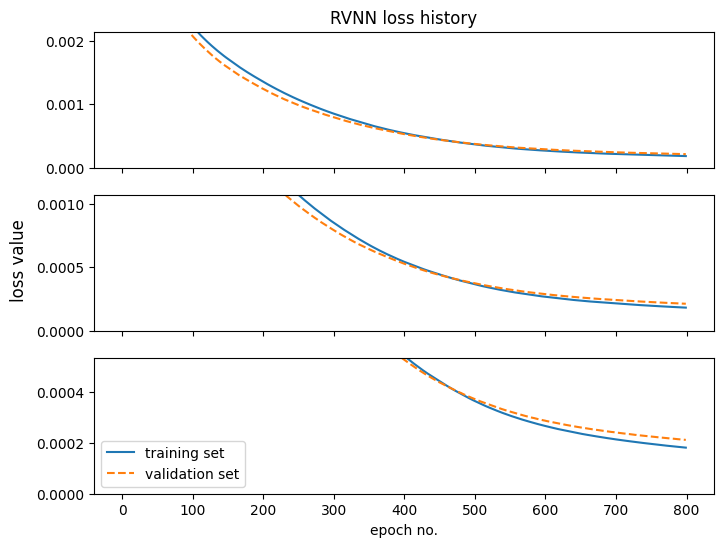

In [205]:
plot_loss_history(rvnn_history, "RVNN")

## Comparision

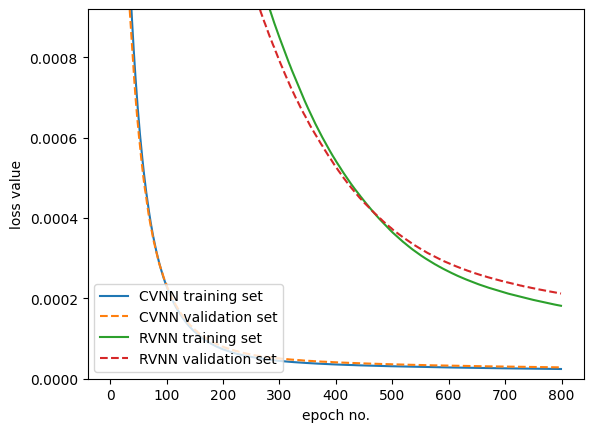

In [206]:
plot_loss_history_comparision(rvnn_history, cvnn_history, 2)

macro parameters: learning_rate=0.005, momentum=0.0


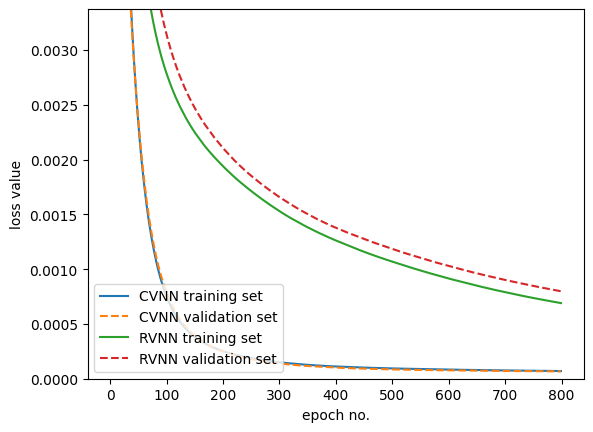

macro parameters: learning_rate=0.005, momentum=0.01


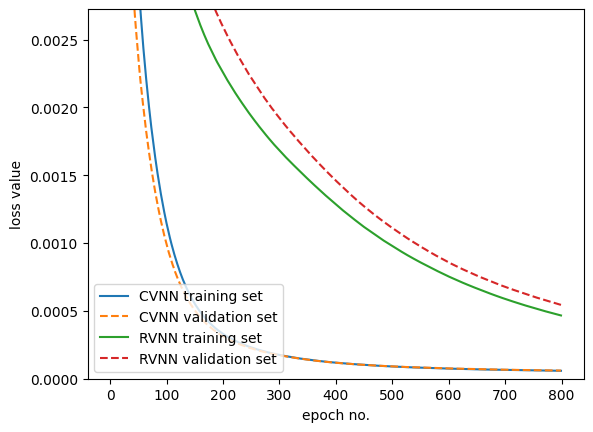

macro parameters: learning_rate=0.005, momentum=0.05


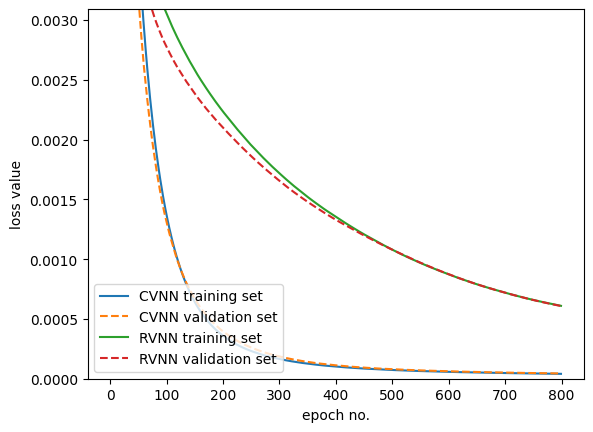

macro parameters: learning_rate=0.005, momentum=0.2


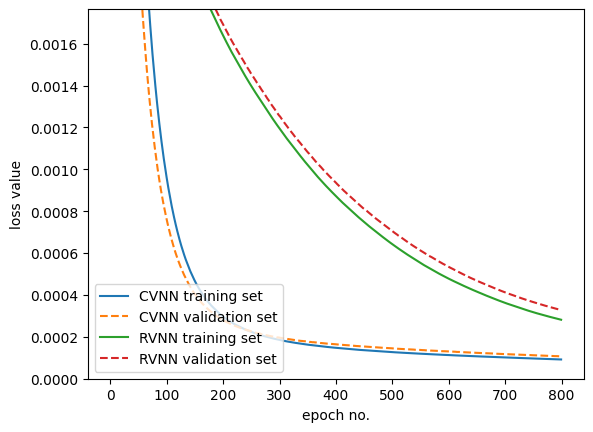

macro parameters: learning_rate=0.01, momentum=0.0


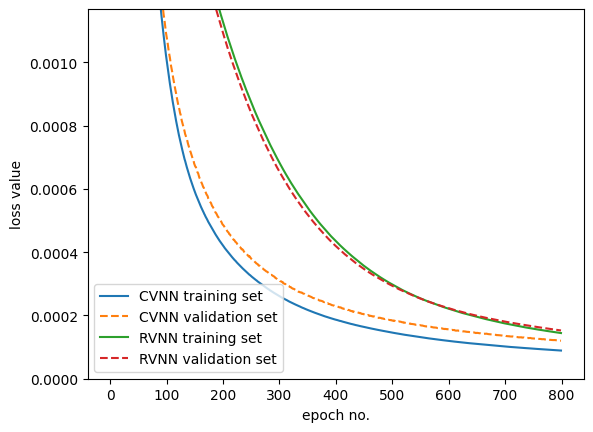

macro parameters: learning_rate=0.01, momentum=0.01


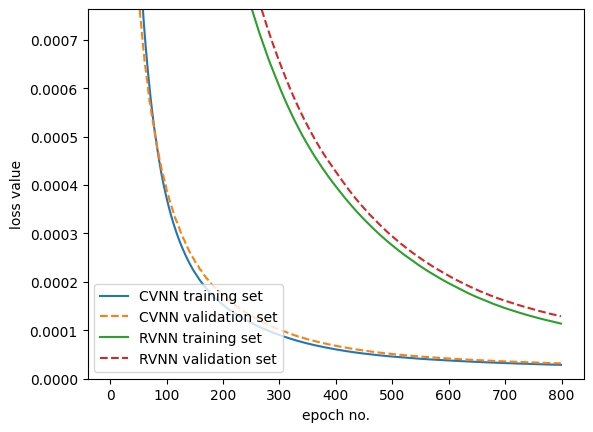

macro parameters: learning_rate=0.01, momentum=0.05


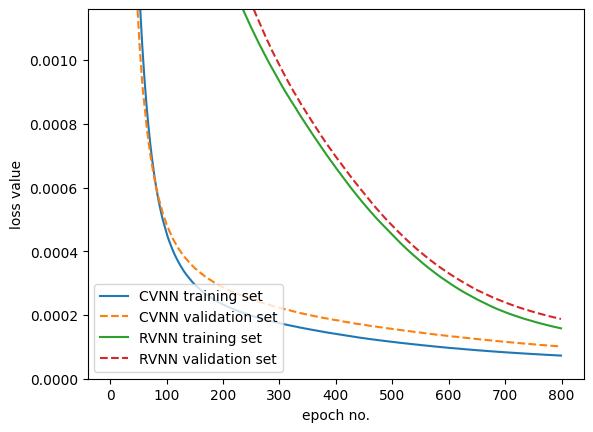

macro parameters: learning_rate=0.01, momentum=0.2


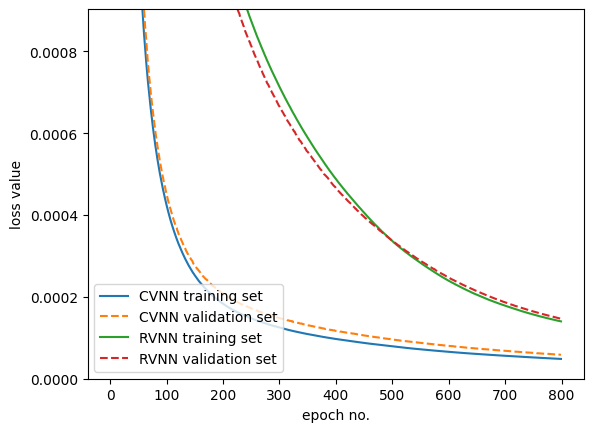

macro parameters: learning_rate=0.02, momentum=0.0


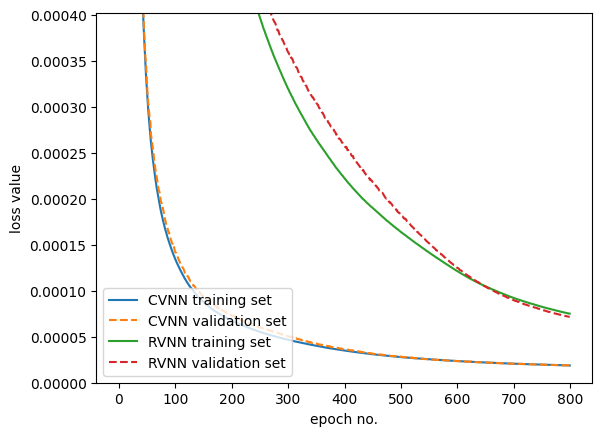

macro parameters: learning_rate=0.02, momentum=0.01


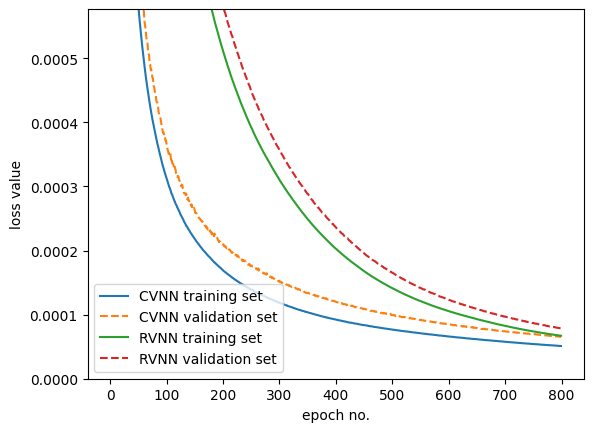

macro parameters: learning_rate=0.02, momentum=0.05


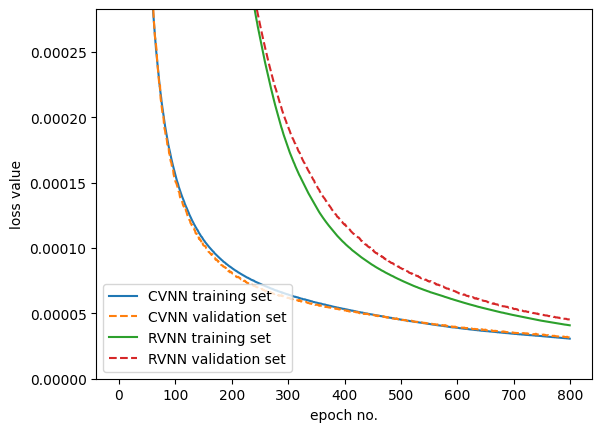

macro parameters: learning_rate=0.02, momentum=0.2


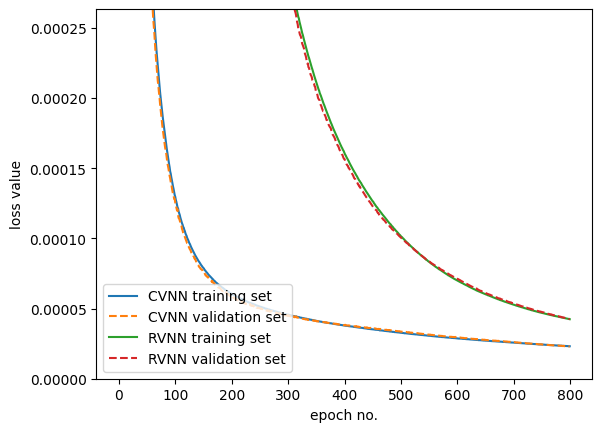

In [216]:
# learning_rate_list = [0.005, 0.01, 0.02]
# momentum_list = [0., 0.01, 0.05, 0.2]

# for learning_rate in learning_rate_list:
#     for momentum in momentum_list:
#         OPTIMIZER = lambda: SGD(jit_compile=True, learning_rate=learning_rate, momentum=momentum)
        
#         rvnn_model = make_rvnn_model()
#         rvnn_model.compile(loss=MeanSquaredError(), optimizer=OPTIMIZER())
#         rvnn_history = rvnn_model.fit(rvnn_input, rvnn_output, epochs=EPOCH_NUM, validation_split=VAL_RATIO, verbose=VERBOSE_LVL)
        
#         cvnn_model = make_cvnn_model()
#         cvnn_model.compile(loss=ComplexMeanSquareError(), optimizer=OPTIMIZER())
#         cvnn_history = cvnn_model.fit(np.array(data), expected_output, epochs=EPOCH_NUM, validation_split=VAL_RATIO, verbose=VERBOSE_LVL)
        
#         print(f'macro parameters: learning_rate={learning_rate}, momentum={momentum}')
#         plot_loss_history_comparision(rvnn_history, cvnn_history, 2)